In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
df = pd.read_csv("../data/OCM-data.csv")
df.head(5)

,Name,M1,M1_atom_number,M2,M2_atom_number,M3,M3_atom_number,Support,Support_ID,M2_mol,...,C2y,C2H6y,C2H4y,COy,CO2y,C2s,C2H6s,C2H4s,COs,CO2s
0,Mn-Na2WO4/BN,Mn,25,Na,11,W,74,BN,4,0.37,...,5.86,0.68,5.18,30.82,6.01,16.15,1.87,14.28,84.95,16.57
1,Mn-Na2WO4/BN,Mn,25,Na,11,W,74,BN,4,0.37,...,6.29,0.70,5.59,31.29,5.76,16.98,1.89,15.09,84.48,15.55
2,Mn-Na2WO4/BN,Mn,25,Na,11,W,74,BN,4,0.37,...,5.34,0.55,4.79,21.62,3.12,19.90,2.05,17.85,80.58,11.63
3,Mn-Na2WO4/BN,Mn,25,Na,11,W,74,BN,4,0.37,...,6.16,0.62,5.54,22.49,3.00,25.17,2.53,22.64,91.91,12.26
4,Mn-Na2WO4/BN,Mn,25,Na,11,W,74,BN,4,0.37,...,6.54,0.65,5.89,22.34,2.86,27.22,2.70,24.51,92.97,11.90


In [3]:
selected_df = df[['M1_atom_number', 'M2_atom_number', 'M3_atom_number', 'Support_ID', 'M2_mol', 'M3_mol', 'M1_mol_percentage', 'M2_mol_percentage', 'M3_mol_percentage', 'Temp', 'Total_flow', 'Ar_flow', 'CH4_flow', 'O2_flow', 'CT']]
selected_df

,M1_atom_number,M2_atom_number,M3_atom_number,Support_ID,M2_mol,M3_mol,M1_mol_percentage,M2_mol_percentage,M3_mol_percentage,Temp,Total_flow,Ar_flow,CH4_flow,O2_flow,CT
0,25,11,74,4,0.37,0.185,40,40,20,900,10,1.5,5.7,2.8,0.75
1,25,11,74,4,0.37,0.185,40,40,20,900,15,2.3,8.5,4.3,0.50
2,25,11,74,4,0.37,0.185,40,40,20,900,20,3.0,11.3,5.7,0.38
3,25,11,74,4,0.37,0.185,40,40,20,900,10,1.5,6.4,2.1,0.75
4,25,11,74,4,0.37,0.185,40,40,20,900,15,2.3,9.6,3.2,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,0,11,0,11,0.37,0.000,0,100,0,700,15,10.5,3.6,0.9,0.50
12704,0,11,0,11,0.37,0.000,0,100,0,700,20,14.0,4.8,1.2,0.38
12705,0,11,0,11,0.37,0.000,0,100,0,700,10,7.0,2.6,0.4,0.75
12706,0,11,0,11,0.37,0.000,0,100,0,700,15,10.5,3.9,0.6,0.50


In [4]:
std_df = StandardScaler().fit_transform(selected_df)
std_df

array([[ 0.08747892,  0.10497433,  0.69162147, ..., -0.31039657,
         0.64122604,  1.3408736 ],
       [ 0.08747892,  0.10497433,  0.69162147, ...,  0.53294506,
         1.89126958, -0.28115092],
       [ 0.08747892,  0.10497433,  0.69162147, ...,  1.37628668,
         3.05797688, -1.05972268],
       ...,
       [-1.28374929,  0.10497433, -1.64315962, ..., -1.24409623,
        -1.35884362,  1.3408736 ],
       [-1.28374929,  0.10497433, -1.64315962, ..., -0.85254476,
        -1.19217115, -0.28115092],
       [-1.28374929,  0.10497433, -1.64315962, ..., -0.49111263,
        -0.94216245, -1.05972268]])

In [9]:
scaler = StandardScaler()
scaler.fit(selected_df)
scaled_data = scaler.transform(selected_df)
scaled_data

array([[ 0.08747892,  0.10497433,  0.69162147, ..., -0.31039657,
         0.64122604,  1.3408736 ],
       [ 0.08747892,  0.10497433,  0.69162147, ...,  0.53294506,
         1.89126958, -0.28115092],
       [ 0.08747892,  0.10497433,  0.69162147, ...,  1.37628668,
         3.05797688, -1.05972268],
       ...,
       [-1.28374929,  0.10497433, -1.64315962, ..., -1.24409623,
        -1.35884362,  1.3408736 ],
       [-1.28374929,  0.10497433, -1.64315962, ..., -0.85254476,
        -1.19217115, -0.28115092],
       [-1.28374929,  0.10497433, -1.64315962, ..., -0.49111263,
        -0.94216245, -1.05972268]])

In [14]:
pca = PCA(n_components=13)
pca.fit(scaled_data)
principalComponents = pca.transform(scaled_data)
print(principalComponents)

[[-0.9313356  -1.29937312 -1.774844   ... -0.00819384  0.00481655
   0.02412482]
 [-0.9313356   1.19115616 -1.57938707 ... -0.00819384  0.00481655
   0.02412482]
 [-0.9313356   3.18894695 -1.61725033 ... -0.00819384  0.00481655
   0.02412482]
 ...
 [ 1.17685842 -2.56120811  0.37335017 ...  1.22533758  0.75154039
   0.09852288]
 [ 1.17685842 -0.7312195   1.65868015 ...  1.22533758  0.75154039
   0.09852288]
 [ 1.17685842  0.66527697  2.67913801 ...  1.22533758  0.75154039
   0.09852288]]


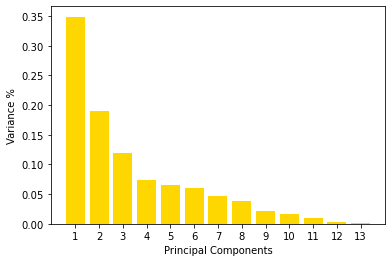

In [11]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)
plt.show()

In [15]:
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.931336,-1.299373,-1.774844,0.119251,-1.822654,2.011567,0.316573,0.221966,-0.678504,-0.177929,-0.008194,0.004817,0.024125
1,-0.931336,1.191156,-1.579387,0.119251,-1.822654,2.011567,0.316573,0.221966,-1.006902,-0.177929,-0.008194,0.004817,0.024125
2,-0.931336,3.188947,-1.617250,0.119251,-1.822654,2.011567,0.316573,0.221966,-1.332300,-0.177929,-0.008194,0.004817,0.024125
3,-0.931336,-1.453914,-1.637418,0.119251,-1.822654,2.011567,0.316573,0.221966,-0.093727,-0.177929,-0.008194,0.004817,0.024125
4,-0.931336,0.948306,-1.363432,0.119251,-1.822654,2.011567,0.316573,0.221966,-0.087966,-0.177929,-0.008194,0.004817,0.024125
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12703,1.176858,-0.664988,1.599783,-3.510212,0.747488,-1.097018,0.474492,2.856379,0.049831,0.047814,1.225338,0.751540,0.098523
12704,1.176858,0.731509,2.620241,-3.510212,0.747488,-1.097018,0.474492,2.856379,0.057412,0.047814,1.225338,0.751540,0.098523
12705,1.176858,-2.561208,0.373350,-3.510212,0.747488,-1.097018,0.474492,2.856379,0.141661,0.047814,1.225338,0.751540,0.098523
12706,1.176858,-0.731220,1.658680,-3.510212,0.747488,-1.097018,0.474492,2.856379,0.300450,0.047814,1.225338,0.751540,0.098523


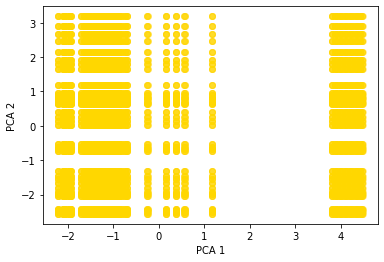

In [16]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()